In [1]:
import pandas as pd
import numpy as np

In [2]:
sym = pd.read_pickle('DATA/data.pickle', compression='infer')
sym = pd.DataFrame(sym)
sym.img = sym.img.apply(lambda x: x.ravel())
sym['label']

0       +
1       -
2       x
3       /
4       (
       ..
4895    x
4896    /
4897    (
4898    )
4899    ,
Name: label, Length: 4900, dtype: object

In [3]:
def sym_to_num(x):
    if x == '+':
        return 10
    if x == '-':
        return 11
    if x == 'x':
        return 12
    if x == '/':
        return 13
    if x == '(':
        return 14
    if x == ')':
        return 15
    if x == ',':
        return 16

In [4]:
sym['label'] = sym['label'].apply(sym_to_num)
sym['label']

0       10
1       11
2       12
3       13
4       14
        ..
4895    12
4896    13
4897    14
4898    15
4899    16
Name: label, Length: 4900, dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title(y[idx])
    plt.show()

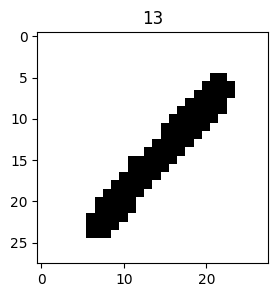

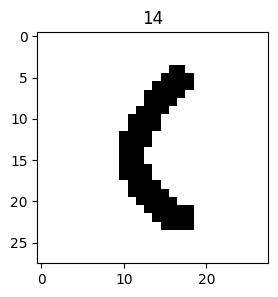

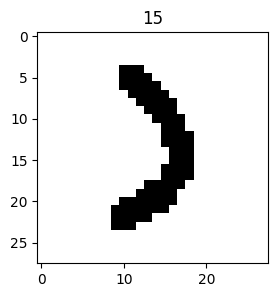

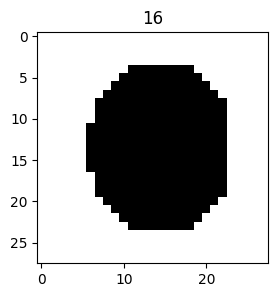

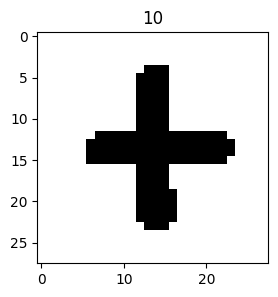

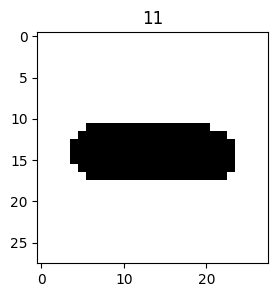

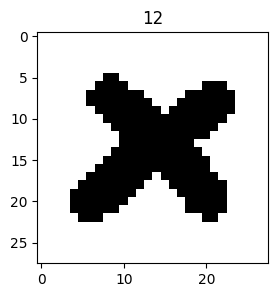

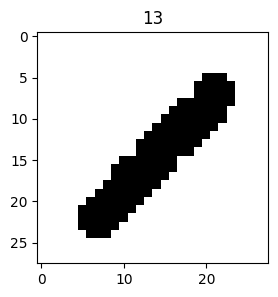

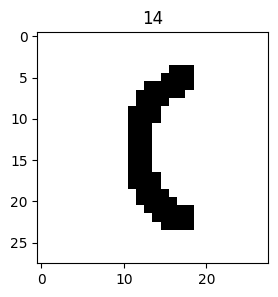

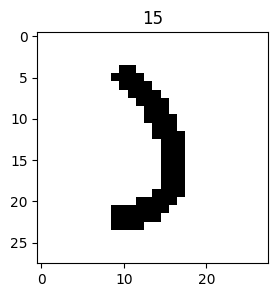

In [7]:
plt.rcParams["figure.figsize"] = (20,3)

for i in range(10,20):
    plot_digit(sym.img, sym.label, i)

In [8]:
import struct
num = pd.DataFrame()
with open('DATA/train-labels.idx1-ubyte', 'rb') as lbpath:
    magic, n = struct.unpack('>II', lbpath.read(8))
    label = np.fromfile(lbpath, dtype=np.uint8)
    num['label'] = label
with open('DATA/train-images.idx3-ubyte', 'rb') as imgpath:
    magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
    img = np.fromfile(imgpath, dtype=np.uint8).reshape(len(label), 784)
    img = img/255
    num['img'] = img.tolist()

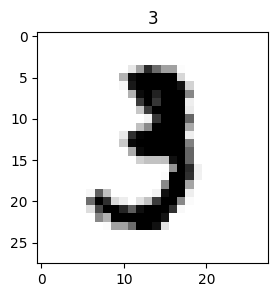

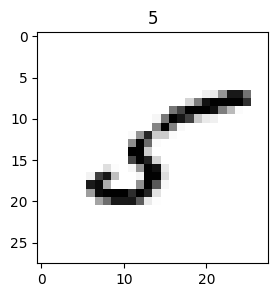

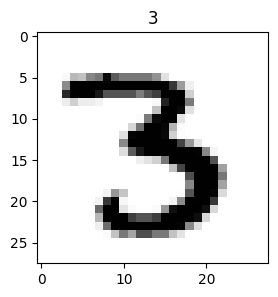

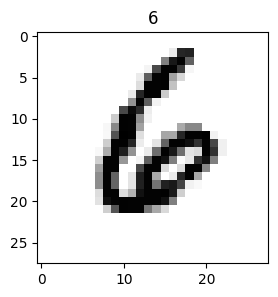

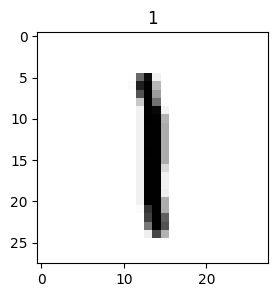

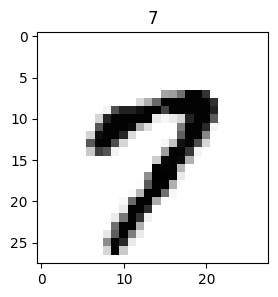

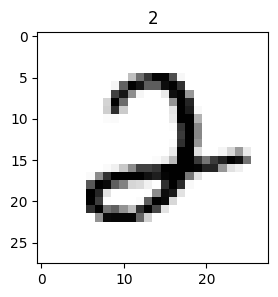

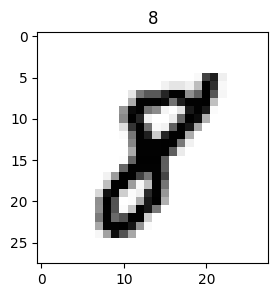

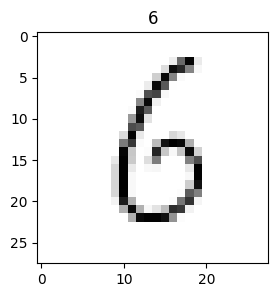

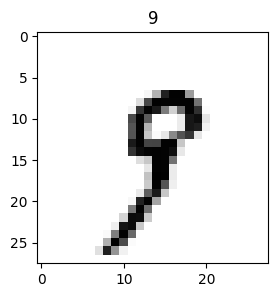

In [9]:
for i in range(10,20):
    plot_digit(img, num.label, i)

In [10]:
DF2 = pd.DataFrame(num['img'].tolist())
DF2

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from keras.preprocessing.image import ImageDataGenerator
DF1 = pd.DataFrame(sym['img'].tolist())
DF1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
DF1.shape

(4900, 784)

In [13]:
DF1 = DF1.values.reshape(-1,28,28,1)
DF1.shape

(4900, 28, 28, 1)

In [14]:
DF1

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [16]:
augmentation_factor = 9

# Generate augmented data
aug = []
labl = []

for i in range(augmentation_factor):
    aug.extend(datagen.flow(DF1, batch_size=len(DF1), shuffle=False).next())
    labl.append(sym.label)

labl = pd.concat(labl, ignore_index=True)

In [17]:
labl

0        10
1        11
2        12
3        13
4        14
         ..
44095    12
44096    13
44097    14
44098    15
44099    16
Name: label, Length: 44100, dtype: int64

In [18]:
aug = np.array(aug).squeeze()
aug = aug.reshape(-1,28,28,1)
aug.shape

(44100, 28, 28, 1)

In [19]:
DF1 = aug
DF1 = DF1.reshape(44100, 784)
DF1.shape

(44100, 784)

In [20]:
DF1 = pd.DataFrame(DF1)
DF1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
imgs = pd.concat([DF2, DF1], ignore_index=True)
len(imgs)

104100

In [22]:
labels = pd.concat([num['label'], labl], ignore_index=True)
len(labels)

104100

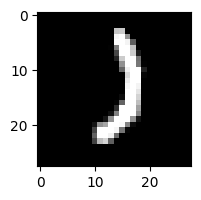

In [23]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
X = imgs
y = labels
X = X.values.reshape(-1,28,28,1)
y = to_categorical(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
plt.figure(figsize=(2,2))
plt.imshow(X_train[78195][:,:,0], cmap = 'Greys_r')

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [25]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(17, activation = "softmax"))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [27]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,loss=['categorical_crossentropy'],metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs=3
batch_size=64

# Actual model being used has been trained for 30 epochs

In [28]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                    epochs = epochs, validation_data = (X_test,y_test),
                    verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[learning_rate_reduction])

model.save(filepath = "example.h5")

Epoch 1/3
1301/1301 - 280s - loss: 0.3523 - accuracy: 0.8887 - val_loss: 0.0625 - val_accuracy: 0.9794 - lr: 0.0010 - 280s/epoch - 215ms/step
Epoch 2/3
1301/1301 - 242s - loss: 0.1195 - accuracy: 0.9602 - val_loss: 0.0529 - val_accuracy: 0.9826 - lr: 0.0010 - 242s/epoch - 186ms/step
Epoch 3/3
1301/1301 - 233s - loss: 0.0983 - accuracy: 0.9680 - val_loss: 0.0692 - val_accuracy: 0.9804 - lr: 0.0010 - 233s/epoch - 179ms/step


Text(0, 0.5, 'accuracy')

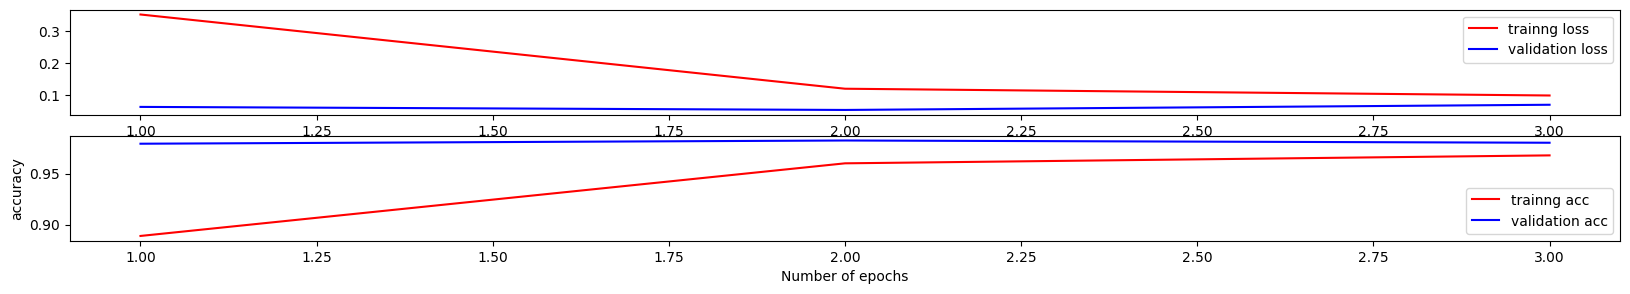

In [29]:
fig,ax=plt.subplots(2,1)
fig.set
x=range(1,1+epochs)
ax[0].plot(x,history.history['loss'],color='red')
ax[0].plot(x,history.history['val_loss'],color='blue')

ax[1].plot(x,history.history['accuracy'],color='red')
ax[1].plot(x,history.history['val_accuracy'],color='blue')
ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')

In [30]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)

651/651 [==============================] - 22s 32ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,17),columns=range(0,17))
conf


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1178,0,3,0,0,4,1,2,2,2,0,0,0,0,0,0,4
1,0,1251,6,1,5,1,0,6,2,1,0,0,0,48,4,9,1
2,0,0,1186,11,0,0,0,2,2,2,0,0,1,0,0,0,0
3,0,0,0,1278,0,5,0,0,3,2,0,0,0,0,0,0,0
4,0,0,0,0,1214,0,0,1,0,2,0,0,0,0,0,0,0
5,0,0,0,3,0,1085,0,1,0,3,0,0,0,0,0,0,0
6,4,2,2,1,4,23,1194,0,1,1,0,0,0,0,0,0,0
7,0,1,6,0,1,0,0,1238,0,15,0,0,0,0,0,3,0
8,1,0,4,7,2,11,0,0,1113,10,0,0,0,0,0,0,0
9,1,0,0,0,8,1,0,4,0,1183,0,0,0,0,0,0,0


In [32]:
x=(y_pre_test-y_test!=0).tolist()
x=[i for i,l in enumerate(x) if l!=False]

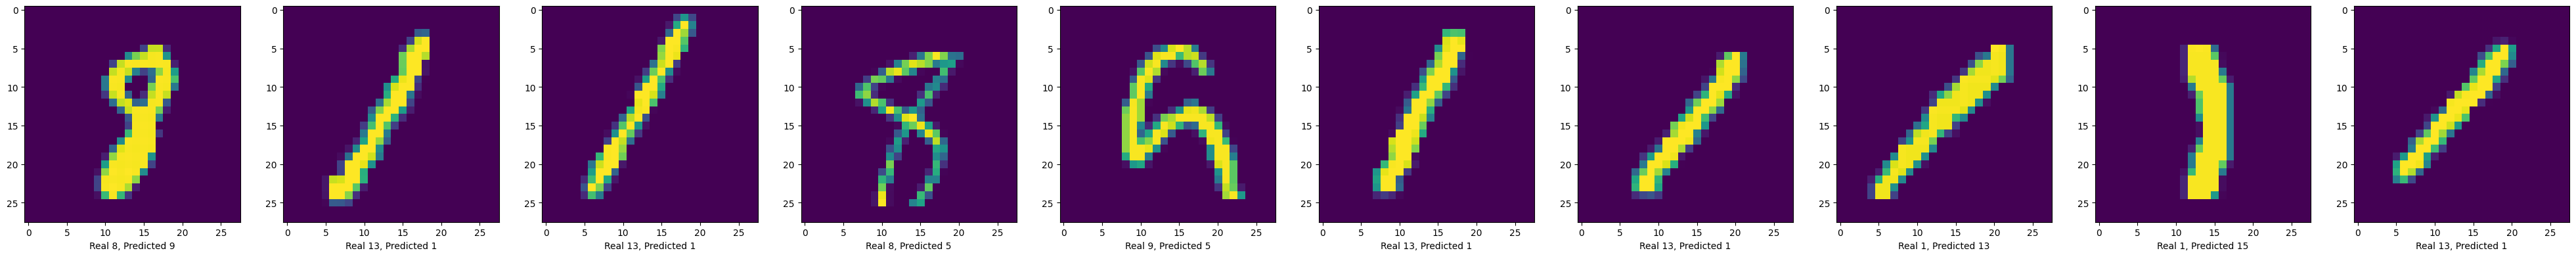

In [33]:
fig,ax=plt.subplots(1,10,sharey=False,figsize=(50,50))

for i in range(10):
    ax[i].imshow(X_test[x[i]][:,:,0])
    ax[i].set_xlabel('Real {}, Predicted {}'.format(y_test[x[i]],y_pre_test[x[i]]))